In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
df = pd.read_csv('twitchdata-update.csv')


In [13]:
df.head

<bound method NDFrame.head of      Watch time(Minutes)  Peak viewers  Average viewers  Followers  \
0             6196161750        222720            27716    3246298   
1             6091677300        310998            25610    5310163   
2             5644590915        387315            10976    1767635   
3             3970318140        300575             7714    3944850   
4             3671000070        285644            29602    8938903   
..                   ...           ...              ...        ...   
995            122524635         21359             9104     601927   
996            122523705          3940              793     213212   
997            122452320          6431              567     109068   
998            122311065         10543             1153     547446   
999            122192850         13788             1205     178553   

     Followers gained  Views gained      Growth  Predicted Growth  
0             1734810      93036735  6290933295        629093

In [ ]:
df.drop('Partnered',axis=1)
df.drop('Mature',axis=1)
#df.head

In [ ]:
columns_to_exclude = ['Language', 'Stream time(minutes)']
df.drop(columns=columns_to_exclude, axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
# Assuming you've already loaded your dataset into a DataFrame named 'df'

# Drop unnecessary columns for training
# columns_to_exclude = ['Mature', 'Partnered', 'Language', 'Stream time(minutes)']
# df.drop(columns=columns_to_exclude, axis=1, inplace=True)

# Define criteria for categorizing channels
best_followers_threshold = 5000000
medium_followers_threshold = 1000000

# Create a new target variable based on the criteria
df['Category'] = pd.cut(df['Followers'],
                        bins=[-float('inf'), medium_followers_threshold, best_followers_threshold, float('inf')],
                        labels=['Worst', 'Medium', 'Best'], include_lowest=True, right=False)

# Calculate 'Growth' as the sum of followers gained, watch time gained, and views gained
df['Growth'] = df['Followers gained'] + df['Watch time(Minutes)'] + df['Views gained']

# Drop unnecessary columns for training (now including 'Channel' and 'Category')
df.drop(['Category'], axis=1, inplace=True)

# Separate features and target variable
X = df[['Watch time(Minutes)', 'Followers']]  # Adjust column names as needed
y = df['Growth']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor (since we are predicting a continuous variable - 'Growth')
regressor = RandomForestRegressor()

# Train the regressor
regressor.fit(X_train, y_train)

# Access feature importances
feature_importances = regressor.feature_importances_

# Create a DataFrame to better visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)


               Feature  Importance
0  Watch time(Minutes)    0.997782
1            Followers    0.002218


In [ ]:
df.head

In [ ]:
# Assuming you've already trained the RandomForestClassifier and loaded the model into 'classifier'

# Separate features and target variable
X = df[['Watch time(Minutes)', 'Followers']]  # Adjust column names as needed

# Use the trained classifier to predict the categories for each channel
predicted_categories = regressor.predict(X)

# Add the predicted categories to the original DataFrame
df['Predicted Category'] = predicted_categories

# Display the DataFrame with predicted categories
print(df[['Channel', 'Predicted Category']])


              Channel  Predicted Category
0               xQcOW        5.963738e+09
1            summit1g        5.994725e+09
2              Gaules        5.690889e+09
3            ESL_CSGO        3.963902e+09
4                Tfue        3.809492e+09
..                ...                 ...
995         LITkillah        1.291026e+08
996  빅헤드 (bighead033)        1.286587e+08
997    마스카 (newmasca)        1.327617e+08
998     AndyMilonakis        1.289658e+08
999              Remx        1.275202e+08

[1000 rows x 2 columns]


In [ ]:
new=pd.read_csv('twitchdata-update.csv')
channel = new.drop('Channel',axis=1)

Decision *Tree* only visualizations

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.00


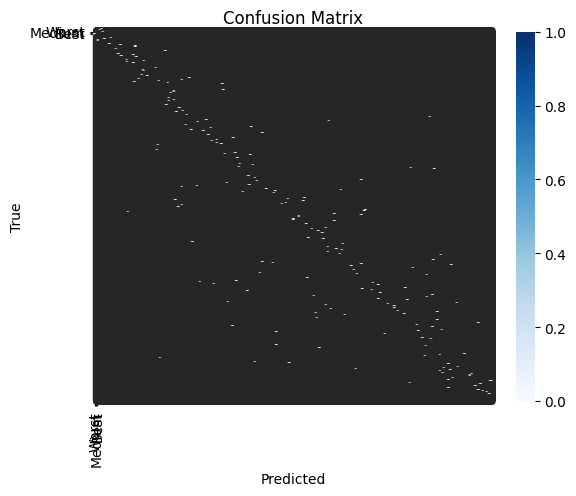

Decision Tree Rules:
 |--- Watch time(Minutes) <= 122322584.00
|   |--- class: 124301702
|--- Watch time(Minutes) >  122322584.00
|   |--- Watch time(Minutes) <= 122488012.00
|   |   |--- class: 125865348
|   |--- Watch time(Minutes) >  122488012.00
|   |   |--- Followers <= 17036.50
|   |   |   |--- class: 166513463
|   |   |--- Followers >  17036.50
|   |   |   |--- Followers <= 30645.00
|   |   |   |   |--- class: 149893727
|   |   |   |--- Followers >  30645.00
|   |   |   |   |--- Watch time(Minutes) <= 122576168.00
|   |   |   |   |   |--- class: 126975891
|   |   |   |   |--- Watch time(Minutes) >  122576168.00
|   |   |   |   |   |--- Watch time(Minutes) <= 122876988.00
|   |   |   |   |   |   |--- class: 210241146
|   |   |   |   |   |--- Watch time(Minutes) >  122876988.00
|   |   |   |   |   |   |--- Watch time(Minutes) <= 123199636.00
|   |   |   |   |   |   |   |--- class: 125448904
|   |   |   |   |   |   |--- Watch time(Minutes) >  123199636.00
|   |   |   |   |   |   | 

In [7]:
columns_to_exclude = ['Mature', 'Partnered', 'Language', 'Stream time(minutes)']
df.drop(columns=columns_to_exclude, axis=1, inplace=True)

# Define criteria for categorizing channels
best_followers_threshold = 5000000
medium_followers_threshold = 1000000

# Create a new target variable based on the criteria
df['Category'] = pd.cut(df['Followers'],
                        bins=[-float('inf'), medium_followers_threshold, best_followers_threshold, float('inf')],
                        labels=['Worst', 'Medium', 'Best'], include_lowest=True, right=False)

# Drop unnecessary columns for training (now including 'Channel' and 'Category')
df.drop(['Channel', 'Category'], axis=1, inplace=True)

df['Growth'] = df['Followers gained'] + df['Watch time(Minutes)'] + df['Views gained']

# Separate features and target variable
X = df[['Watch time(Minutes)', 'Followers']]  # Adjust column names as needed
y = df['Growth']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Worst', 'Medium', 'Best'], yticklabels=['Worst', 'Medium', 'Best'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree (for understanding the splits)
from sklearn.tree import export_text

tree_rules = export_text(classifier, feature_names=['Watch time(Minutes)', 'Followers'])
print("Decision Tree Rules:\n", tree_rules)

output

0                 xQcOW
1              summit1g
2                Gaules
3              ESL_CSGO
4                  Tfue
             ...       
995           LITkillah
996    빅헤드 (bighead033)
997      마스카 (newmasca)
998       AndyMilonakis
999                Remx
Name: Channel, Length: 1000, dtype: object      Predicted Growth
0          6290933295
1          6182753448
2          5748226301
3          4077569068
4          3752067081
..                ...
995         126975891
996         126975891
997         125865348
998         124301702
999         124301702

[1000 rows x 1 columns]


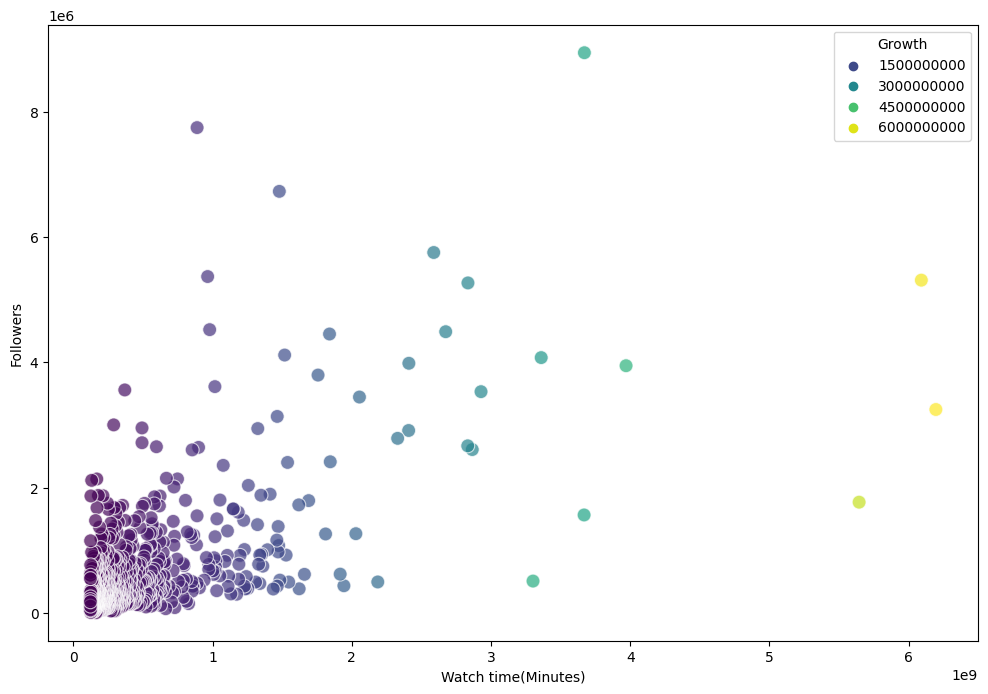

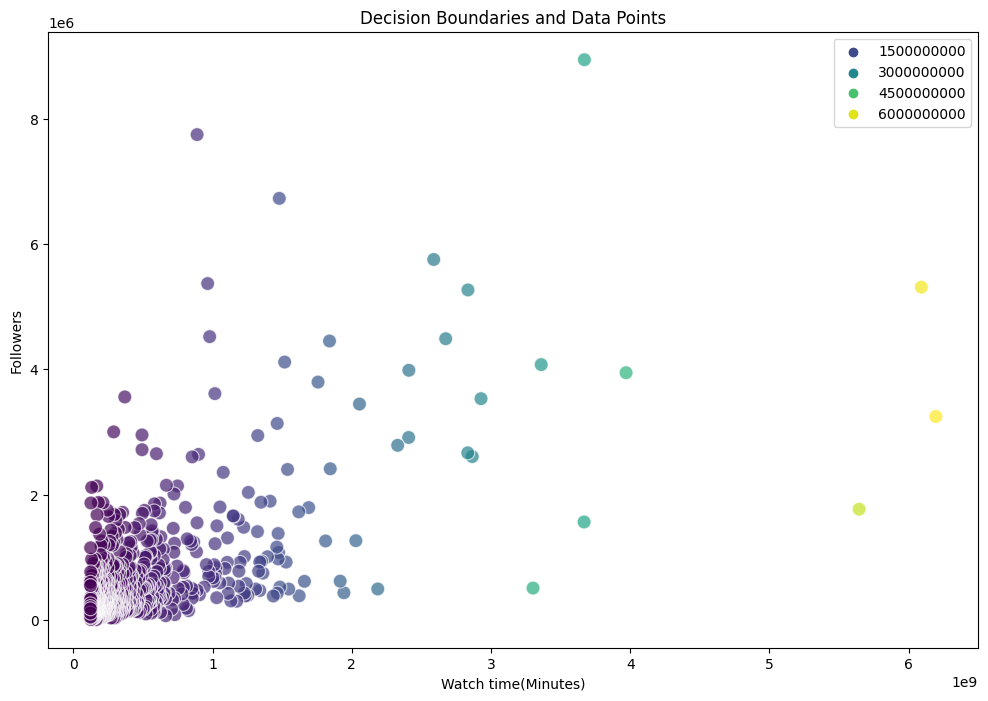

In [4]:
# Assuming you've already loaded your dataset into a DataFrame named 'df'
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('twitchdata-update.csv')

# Drop unnecessary columns for training
columns_to_exclude = ['Mature', 'Partnered', 'Language', 'Stream time(minutes)']
df.drop(columns=columns_to_exclude, axis=1, inplace=True)

# Define criteria for categorizing channels
best_followers_threshold = 5000000
medium_followers_threshold = 1000000

# Create a new target variable based on the criteria
df['Category'] = pd.cut(df['Followers'],
                        bins=[-float('inf'), medium_followers_threshold, best_followers_threshold, float('inf')],
                        labels=['Worst', 'Medium', 'Best'], include_lowest=True, right=False)
c=df['Channel']
# Drop unnecessary columns for training (now including 'Channel' and 'Category')
df.drop(['Channel', 'Category'], axis=1, inplace=True)

df['Growth'] = df['Followers gained'] + df['Watch time(Minutes)'] + df['Views gained']

# Separate features and target variable
X = df[['Watch time(Minutes)', 'Followers']]  # Adjust column names as needed
y = df['Growth']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Add the predicted categories to the original DataFrame
df['Predicted Growth'] = classifier.predict(X)

# Display the DataFrame with predicted growth
print(c,df[['Predicted Growth']])

# Visualize the decision boundaries and data points
plt.figure(figsize=(12, 8))

# Plot training data points
sns.scatterplot(x='Watch time(Minutes)', y='Followers', hue='Growth', data=df, palette='viridis', alpha=0.7, s=100)

# Plot decision boundaries
# Import necessary libraries
import numpy as np
from matplotlib.colors import ListedColormap



# Function to plot decision boundaries
def plot_decision_boundaries(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

# Rest of the code remains the same...

# Visualize the decision boundaries and data points
plt.figure(figsize=(12, 8))

# Plot training data points
sns.scatterplot(x='Watch time(Minutes)', y='Followers', hue='Growth', data=df, palette='viridis', alpha=0.7, s=100)

# Plot decision boundaries
# plot_decision_boundaries(X_train.values, y_train.values, classifier)

plt.title('Decision Boundaries and Data Points')
plt.xlabel('Watch time(Minutes)')
plt.ylabel('Followers')
plt.legend()
plt.show()

